# Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_csv('train-data.csv')
df.head()

ModuleNotFoundError: No module named 'matplotlib'

# EDA & Some Cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [11]:
# Check for null values
pd.DataFrame(df.isnull().mean()*100, columns=['% null values'])

,% null values
Unnamed: 0,0.000000
Name,0.000000
Location,0.000000
Year,0.000000
Kilometers_Driven,0.000000
Fuel_Type,0.000000
Transmission,0.000000
Owner_Type,0.000000
Mileage,0.033228
Engine,0.598106


In [12]:
# Drop some columns
# 'Unnamed: 0' (just an index) 
# 'New_Price' (too many null values)

df.drop(['Unnamed: 0', 'New_Price'], axis=1, inplace=True)

In [13]:
# Change the float format
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.00,6019.00,5977.00,6019.00
mean,2013.36,58738.38,5.28,9.48
std,3.27,91268.84,0.81,11.19
min,1998.00,171.00,0.00,0.44
25%,2011.00,34000.00,5.00,3.50
50%,2014.00,53000.00,5.00,5.64
75%,2016.00,73000.00,5.00,9.95
max,2019.00,6500000.00,10.00,160.00


`Some Strange Numbers`
* 'Kilometers_Driven' has max. of 6500000
* 'Seats' has min. of 0
* 'Price' has max. of 160.0 which is very far from 75% quartile of 9.95

`We will handle these outliers later`

In [14]:
df.describe(include='O')

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power
count,6019,6019,6019,6019,6019,6017,5983,5983
unique,1876,11,5,2,4,442,146,372
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp
freq,49,790,3205,4299,4929,172,606,235


`Mileage, Engine and Power features need to be converted to float type.`

In [15]:
# Drop the null values as they are less than 1% of the data
df.dropna(inplace=True)

In [16]:
# Check the 'Name' feature 
print('Number of unique values in Name feature: ', df['Name'].nunique())
df.Name.sample(10)

Number of unique values in Name feature:  1855


4385                    Maruti Baleno Zeta 1.3
4115                    Maruti SX4 ZXI MT BSIV
4426                      Ford Figo Petrol EXI
5447       Mercedes-Benz GLA Class 200 d Style
3527                      Hyundai Verna 1.4 EX
409             Audi Q3 35 TDI Quattro Premium
1923    Ford EcoSport 1.5 Diesel Titanium Plus
4746                  Maruti Wagon R LXI BS IV
288           Volkswagen Vento Diesel Highline
5937     Mahindra Scorpio VLX 2WD Airbag BSIII
Name: Name, dtype: object

`There is a pattern in the 'Name' column. The brand name appears first followed by the model name.
 We can extract them into separate columns.`

In [17]:
df['Brand'] = df.Name.str.split(' ').str[0]
df['Model'] = df.Name.str.split(' ').str[1]

df.drop('Name', axis=1, inplace=True)

In [18]:
# Check the new features
print('Number of unique values in Brand feature: ', df['Brand'].nunique())
print('Number of unique values in Model feature: ', df['Model'].nunique())

Number of unique values in Brand feature:  31
Number of unique values in Model feature:  209


In [19]:
# Check other categorical features
for col in ['Owner_Type', 'Seats', 'Brand', 'Location', 'Fuel_Type', 'Transmission']:
    print(df[col].value_counts())
    print('--------------------------------')

First             4903
Second             953
Third              111
Fourth & Above       8
Name: Owner_Type, dtype: int64
--------------------------------
5.00     5012
7.00      674
8.00      134
4.00       99
6.00       31
2.00       16
10.00       5
9.00        3
0.00        1
Name: Seats, dtype: int64
--------------------------------
Maruti           1197
Hyundai          1100
Honda             601
Toyota            409
Mercedes-Benz     318
Volkswagen        315
Ford              298
Mahindra          271
BMW               262
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               25
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Ambassador          1
Isuzu               1
Bentley             1

In [20]:
# Some Feature Engineering
# df.Owner_Type = df.Owner_Type.map({'First':1, 'Second':2, 'Third':3, 'Fourth & Above':4})
df.Engine = df.Engine.str.split(' ').str[0]
df.Power = df.Power.str.split(' ').str[0]

In [21]:
df.sample(5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
3850,Hyderabad,2010,75014,Diesel,Manual,First,21.1 kmpl,1248,73.9,5.00,3.85,Maruti,Ritz
1346,Coimbatore,2012,66245,Petrol,Manual,First,17.0 kmpl,1497,118,5.00,5.68,Honda,City
3563,Hyderabad,2015,61313,Diesel,Manual,First,23.65 kmpl,1248,88.5,5.00,7.99,Maruti,S
1168,Hyderabad,2016,21600,Petrol,Automatic,First,23.1 kmpl,998,67.04,5.00,4.65,Maruti,Celerio
1761,Jaipur,2014,42355,Petrol,Manual,First,18.9 kmpl,1197,82,5.00,4.00,Hyundai,Grand


In [22]:
# Mileage has different units, so we need to convert them to the same unit
df.Mileage

0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
6014     28.4 kmpl
6015     24.4 kmpl
6016     14.0 kmpl
6017     18.9 kmpl
6018    25.44 kmpl
Name: Mileage, Length: 5975, dtype: object

In [23]:
# Convert the units to km/kg
def get_mileage(x):
    num = float(x.split(' ')[0])
    unit = x.split(' ')[1]
    if unit == 'km/kg':
        return num
    elif unit == 'kmpl':
        return num*1.61
    else:
        return np.nan
    
df.Mileage = df.Mileage.apply(get_mileage)

In [24]:
# Convert 'Engine' and 'Power' to numeric
df.Engine = pd.to_numeric(df.Engine, errors='coerce')
df.Power = pd.to_numeric(df.Power, errors='coerce')

In [25]:
# Now we have some null values
pd.DataFrame(df.isnull().mean()*100, columns=['% null values'])

,% null values
Location,0.00
Year,0.00
Kilometers_Driven,0.00
Fuel_Type,0.00
Transmission,0.00
Owner_Type,0.00
Mileage,0.00
Engine,0.00
Power,1.72
Seats,0.00


`'Power' has very low null values, but we will impute them`

In [26]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5975.00,5975.00,5975.00,5975.00,5872.00,5975.00,5975.00
mean,2013.39,58674.31,29.10,1621.61,113.28,5.28,9.50
std,3.25,91558.51,7.17,601.04,53.88,0.81,11.21
min,1998.00,171.00,0.00,624.00,34.20,0.00,0.44
25%,2012.00,33908.00,24.31,1198.00,75.00,5.00,3.50
50%,2014.00,53000.00,29.14,1493.00,97.70,5.00,5.65
75%,2016.00,73000.00,33.68,1984.00,138.10,5.00,9.95
max,2019.00,6500000.00,45.72,5998.00,560.00,10.00,160.00


In [27]:
df.describe(include='object')

,Location,Fuel_Type,Transmission,Owner_Type,Brand,Model
count,5975,5975,5975,5975,5975,5975
unique,11,4,2,4,31,209
top,Mumbai,Diesel,Manual,First,Maruti,Swift
freq,784,3195,4266,4903,1197,343


`Now, Data Types are correct`

`Let's check the distributions of the numerical features`

<Axes: xlabel='Price', ylabel='Count'>

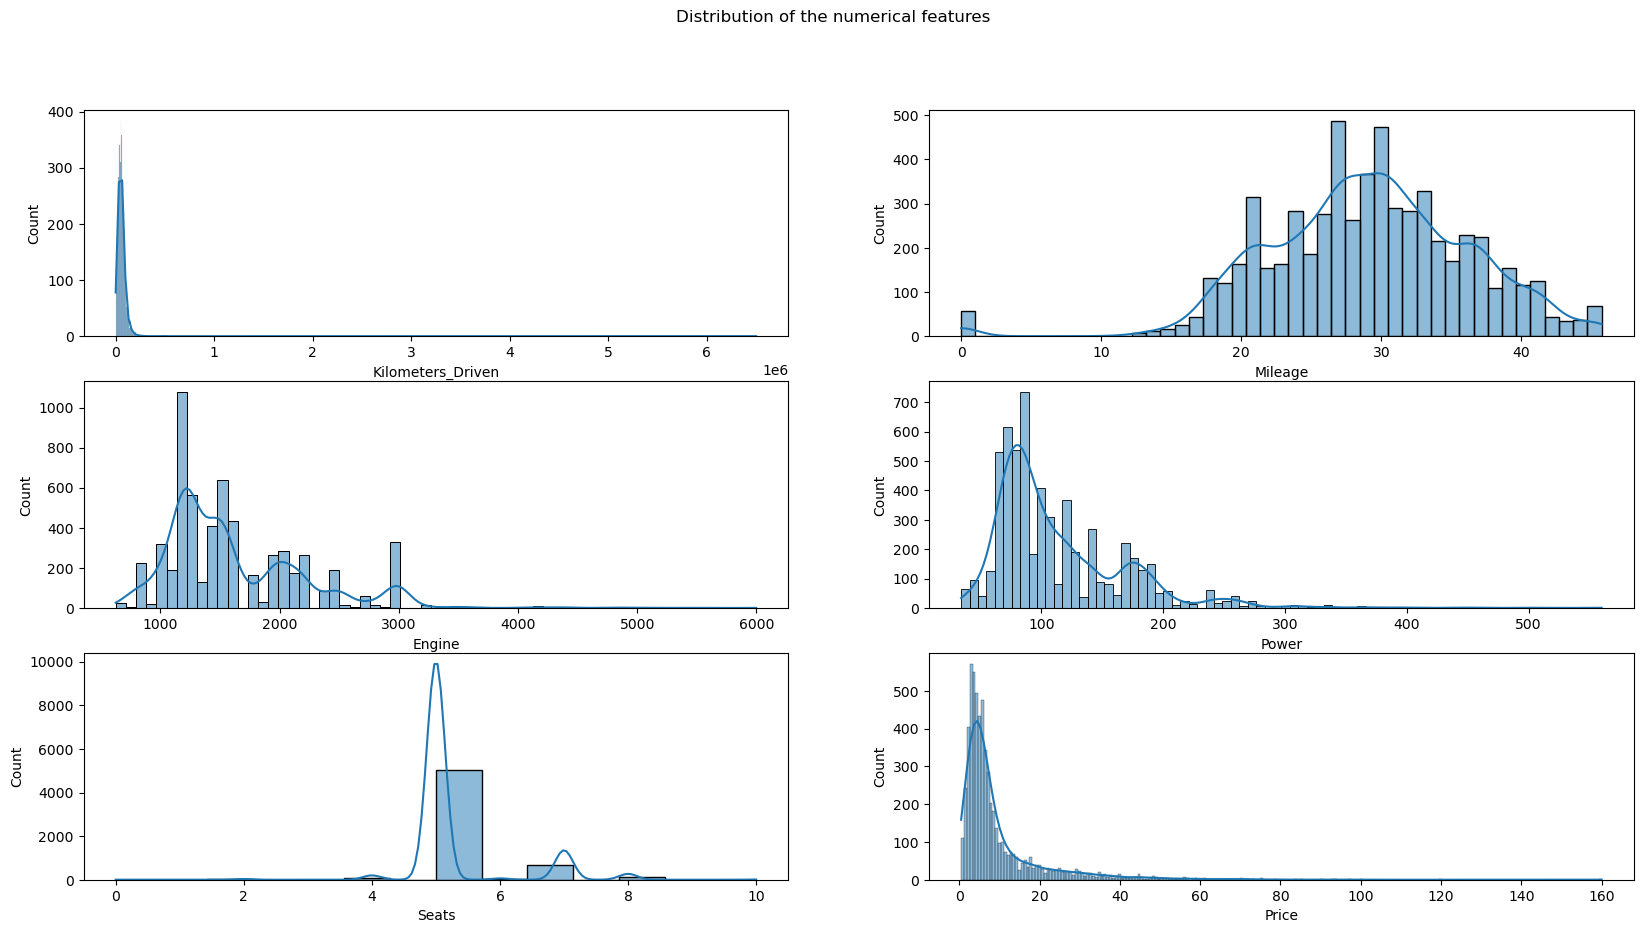

In [28]:
# Distribution of the numerical features
# make grid plot
fig, axes = plt.subplots(3, 2, figsize=(20, 10))
fig.suptitle('Distribution of the numerical features')
sns.histplot(ax=axes[0, 0], data=df, x='Kilometers_Driven', kde=True)
sns.histplot(ax=axes[0, 1], data=df, x='Mileage', kde=True)
sns.histplot(ax=axes[1, 0], data=df, x='Engine', kde=True)
sns.histplot(ax=axes[1, 1], data=df, x='Power', kde=True)
sns.histplot(ax=axes[2, 0], data=df, x='Seats', kde=True)
sns.histplot(ax=axes[2, 1], data=df, x='Price', kde=True)

<Axes: xlabel='Price'>

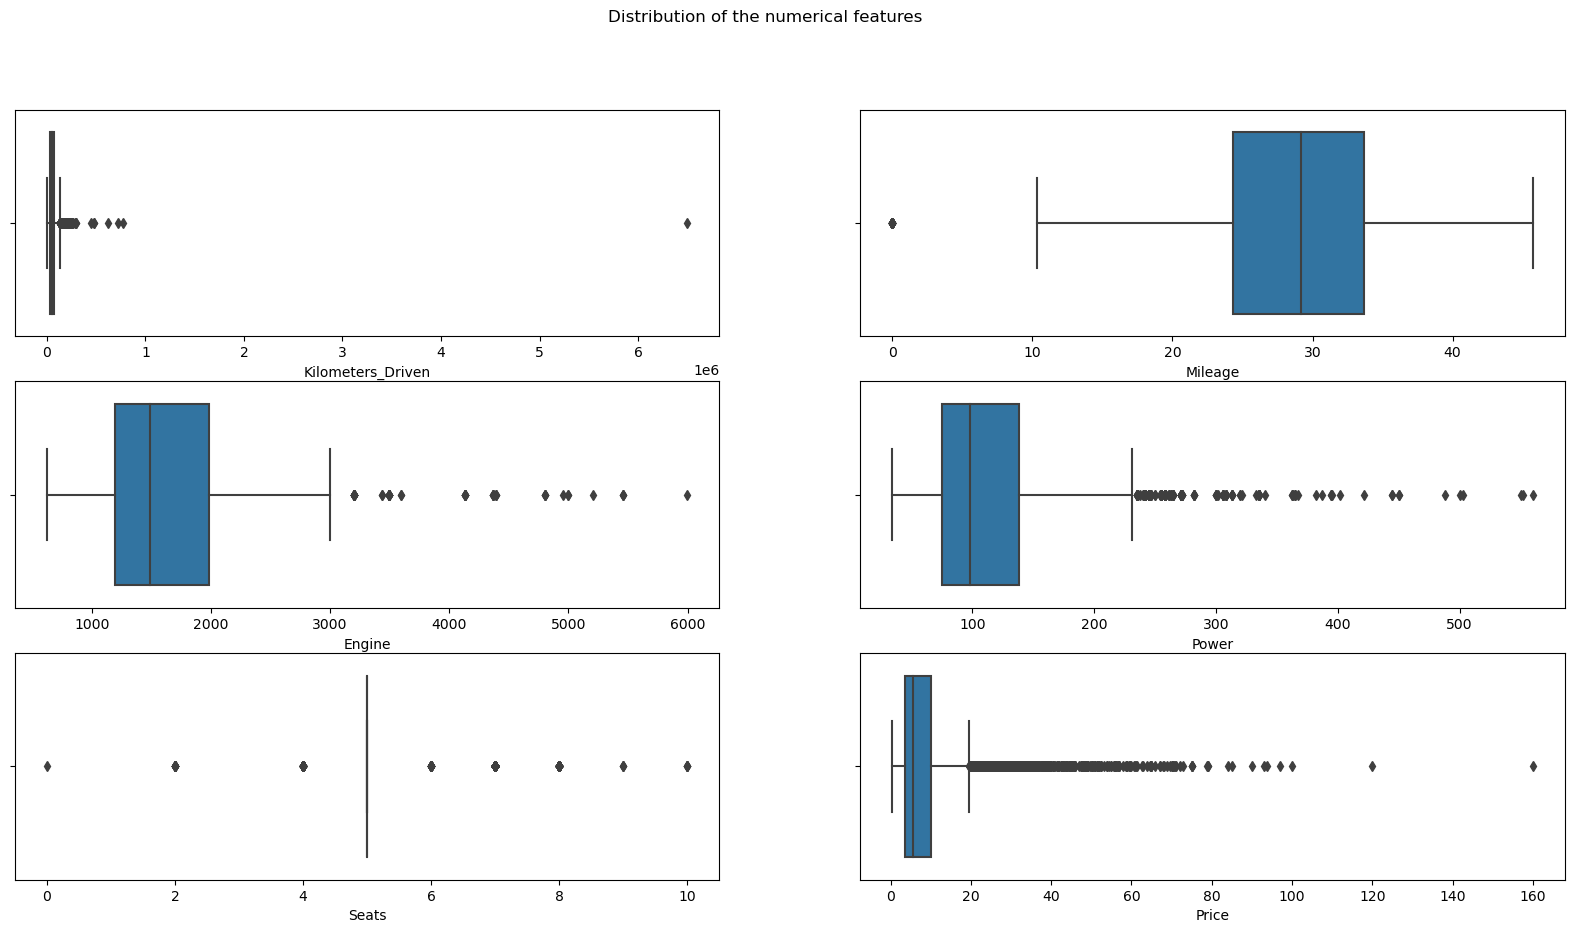

In [29]:
# Box plot for the numerical features
# make grid plot
fig, axes = plt.subplots(3, 2, figsize=(20, 10))
fig.suptitle('Distribution of the numerical features')
sns.boxplot(ax=axes[0, 0], data=df, x='Kilometers_Driven')
sns.boxplot(ax=axes[0, 1], data=df, x='Mileage')
sns.boxplot(ax=axes[1, 0], data=df, x='Engine')
sns.boxplot(ax=axes[1, 1], data=df, x='Power')
sns.boxplot(ax=axes[2, 0], data=df, x='Seats')
sns.boxplot(ax=axes[2, 1], data=df, x='Price')


In [30]:
df.quantile([0, 0.1, 0.25,  0.9, 0.95, 0.99, 1])

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0.00,1998.00,171.00,0.00,624.00,34.20,0.00,0.44
0.10,2009.00,20000.00,20.45,1061.00,67.04,5.00,2.35
0.25,2012.00,33908.00,24.31,1198.00,75.00,5.00,3.50
0.90,2017.00,96719.00,38.38,2494.00,184.00,7.00,22.50
0.95,2018.00,120000.00,40.89,2982.00,204.00,7.00,32.50
0.99,2019.00,172297.00,45.22,3197.26,287.22,8.00,56.04
1.00,2019.00,6500000.00,45.72,5998.00,560.00,10.00,160.00


`There are clear outliers in the 'Kilometer_Driven', 'Mileage' and 'Price' columns. We will remove them Now.`

In [31]:
# We would use quantiles to remove outliers

# Take a copy of the data first
df_copy = df.copy()

# Remove the outliers
df_copy = df_copy[df_copy.Kilometers_Driven < df_copy.Kilometers_Driven.quantile(0.99)]
df_copy = df_copy[df_copy.Mileage > 0]
df_copy = df_copy[df_copy.Seats > 0]
df_copy = df_copy[df_copy.Price < 100]


In [32]:
# # Take a copy of the data first
# df_copy = df.copy()

# # Remove the outliers
# df_copy = df_copy[df_copy.Kilometers_Driven < 6000000]
# df_copy = df_copy[df_copy.Mileage > 0]
# df_copy = df_copy[df_copy.Engine < 5000]

<Axes: xlabel='Price'>

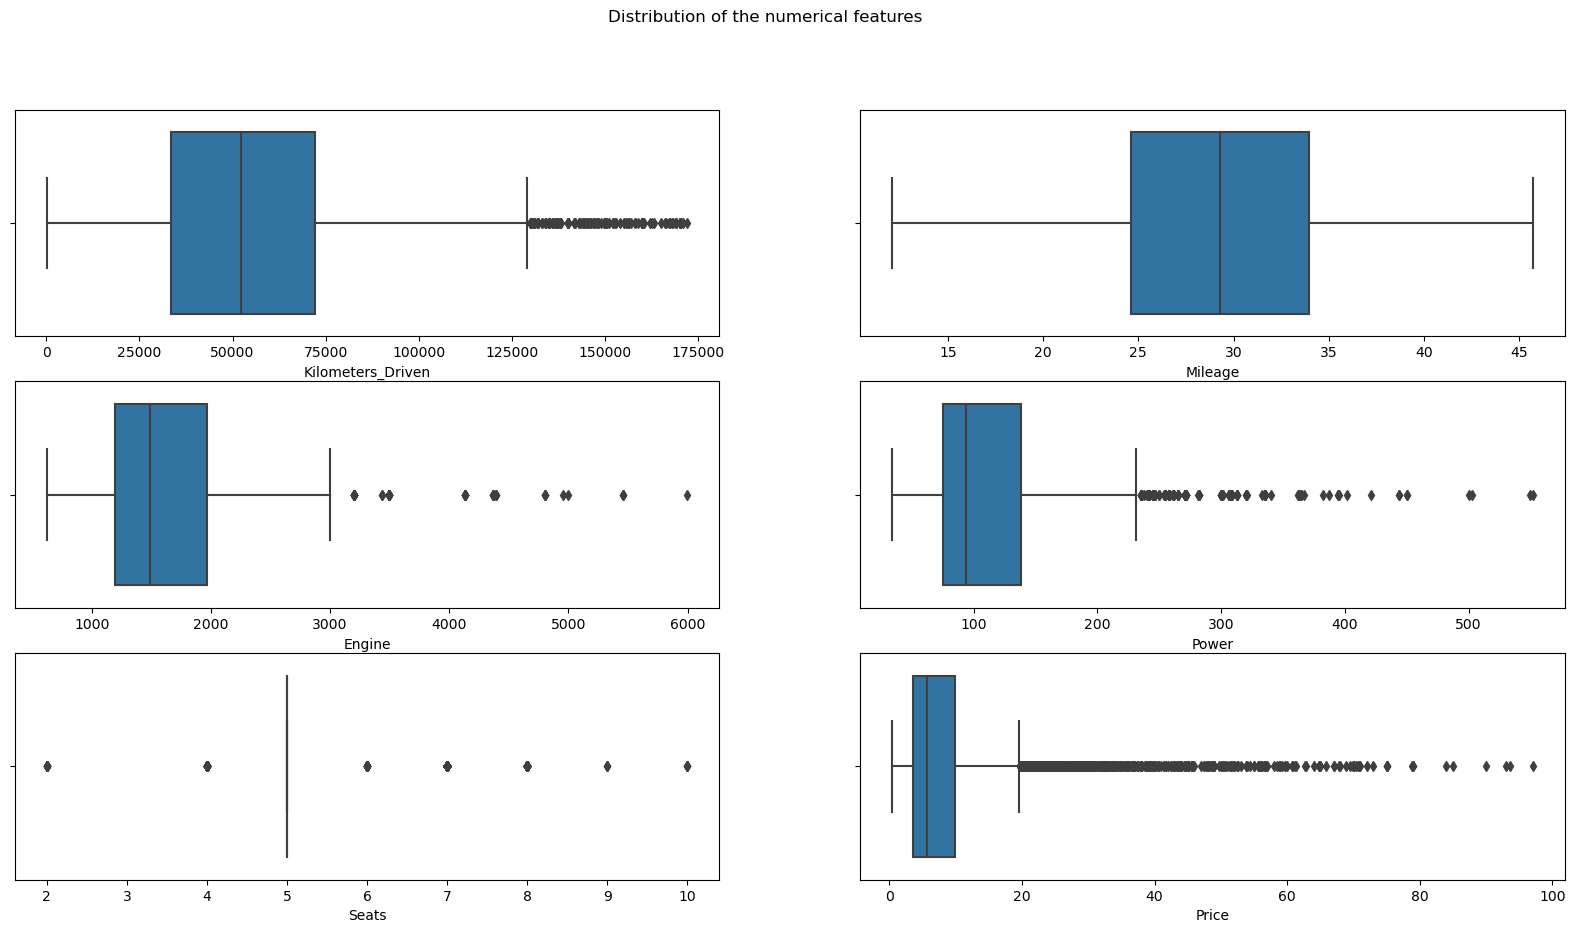

In [33]:
# Recheck the box plot

fig, axes = plt.subplots(3, 2, figsize=(20, 10))
fig.suptitle('Distribution of the numerical features')
sns.boxplot(ax=axes[0, 0], data=df_copy, x='Kilometers_Driven')
sns.boxplot(ax=axes[0, 1], data=df_copy, x='Mileage')
sns.boxplot(ax=axes[1, 0], data=df_copy, x='Engine')
sns.boxplot(ax=axes[1, 1], data=df_copy, x='Power')
sns.boxplot(ax=axes[2, 0], data=df_copy, x='Seats')
sns.boxplot(ax=axes[2, 1], data=df_copy, x='Price')

In [34]:
# Compare the two dataframes
print('Shape of the original dataframe: ', df.shape)
print('Shape of the new dataframe: ', df_copy.shape)
print('Percentage of data removed: {:.2f}%'.format((df.shape[0]-df_copy.shape[0])/df.shape[0]*100))

Shape of the original dataframe:  (5975, 13)
Shape of the new dataframe:  (5858, 13)
Percentage of data removed: 1.96%


In [35]:
df_copy.quantile([0.8, 0.9, 0.95, 0.99, 1])

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0.80,2016.00,77835.40,35.53,1998.00,152.00,5.00,12.50
0.90,2017.00,93347.80,38.48,2494.00,184.00,7.00,22.21
0.95,2018.00,115000.00,40.89,2982.00,204.00,7.00,32.00
0.99,2019.00,150000.00,45.22,2996.00,282.00,8.00,56.00
1.00,2019.00,172050.00,45.72,5998.00,552.00,10.00,97.07


<Axes: >

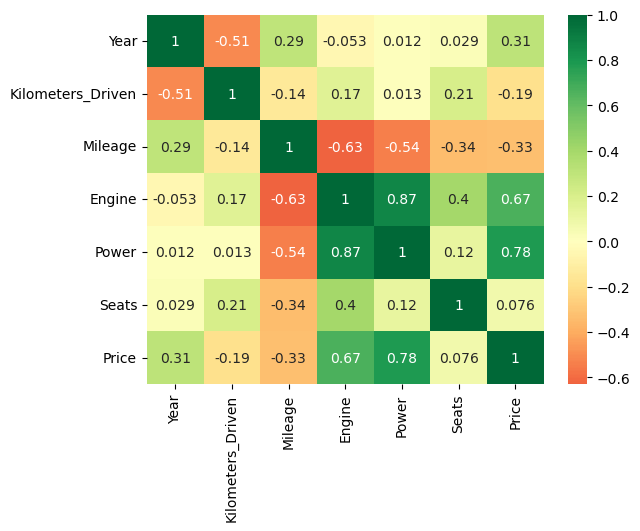

In [36]:
# Check the correlation between the numerical features
# Heatmap
sns.heatmap(df_copy.corr(), annot=True, cmap='RdYlGn', center=0)

In [37]:
# Correlation with the target
df_copy.corr()['Price'].sort_values(ascending=False)

Price                1.00
Power                0.78
Engine               0.67
Year                 0.31
Seats                0.08
Kilometers_Driven   -0.19
Mileage             -0.33
Name: Price, dtype: float64

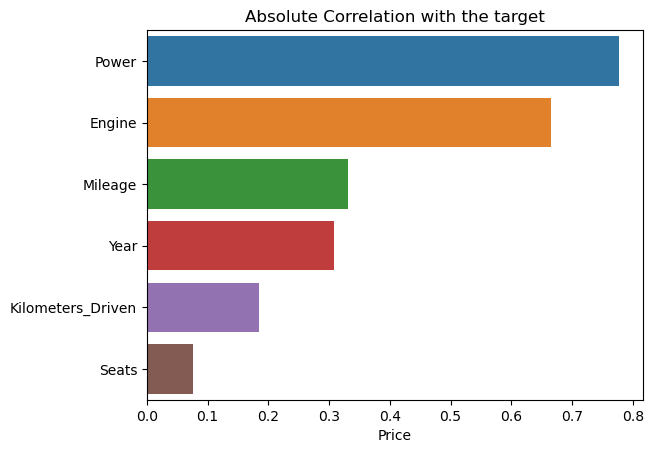

In [38]:
# Reascending 
asc_num_features = df_copy.corr()['Price'].apply(abs).sort_values(ascending=False).drop('Price')
sns.barplot(x=asc_num_features, y=asc_num_features.index)
plt.title('Absolute Correlation with the target')
plt.show()

# Data Splitting


In [39]:
X = df_copy.drop('Price', axis=1)
y = df_copy.Price

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Splitting Columns

num_cols = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Year']
nom_cat_cols = ['Location', 'Fuel_Type', 'Transmission', 'Brand', 'Model']  
ord_cat_cols = ['Owner_Type']  

# Data Preprocessing


In [41]:
from category_encoders import BinaryEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[ ('imputer', SimpleImputer(strategy='median')),
                                         ('scaler', StandardScaler())])

# Preprocessing for categorical data
nominal_categorical_transformer = Pipeline(steps=[('binary', BinaryEncoder())])
ordinal_categorical_transformer = Pipeline(steps=[('ordinal', OrdinalEncoder(categories=[['Fourth & Above', 'Third', 'Second', 'First']]))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(transformers=[('num_prep', numerical_transformer, num_cols),
                                                ('nom_prep', nominal_categorical_transformer, nom_cat_cols),
                                                ('ord_prep', ordinal_categorical_transformer, ord_cat_cols)])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [42]:
X_train_preprocessed.shape, X_test_preprocessed.shape

((4686, 29), (1172, 29))

In [43]:
# Model Building
from sklearn.linear_model import LinearRegression

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_preprocessed, y_train)

# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred = lr.predict(X_test_preprocessed)

# Model Evaluation
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

RMSE: 5.355396132137569
R2: 0.744933358046642


In [44]:
# Training Accuracy
print('Training Accuracy:', lr.score(X_train_preprocessed, y_train))
y_train_pred = lr.predict(X_train_preprocessed)
print('Training Accuracy:', r2_score(y_train, y_train_pred))

Training Accuracy: 0.7380686769440519
Training Accuracy: 0.7380686769440519


In [45]:
# Testing Accuracy
print('Testing Accuracy:', lr.score(X_test_preprocessed, y_test))
y_test_pred = lr.predict(X_test_preprocessed)
print('Testing Accuracy:', r2_score(y_test, y_test_pred))

Testing Accuracy: 0.744933358046642
Testing Accuracy: 0.744933358046642


In [46]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_preprocessed)
X_test_poly = poly.transform(X_test_preprocessed)

lr_poly = LinearRegression()

lr_poly.fit(X_train_poly, y_train)

# Accuracy
print('Training Accuracy', lr_poly.score(X_train_poly, y_train))
print('Testing Accuracy', lr_poly.score(X_test_poly, y_test))


Training Accuracy 0.9351768917834197
Testing Accuracy -1.0931783404492823e+18


In [47]:
X_train_preprocessed.shape, X_train_poly.shape

((4686, 29), (4686, 465))

In [48]:
# Ridge Regression
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train_preprocessed, y_train)

# Predictions
y_pred = ridge.predict(X_test_preprocessed)

# Model Evaluation
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

RMSE: 5.3556022607308345
R2: 0.7449137226961917


In [49]:
# Ridge Regression with polynomial features
from sklearn.linear_model import Ridge

ridge = Ridge(alpha= 100)
ridge.fit(X_train_poly, y_train)

# Predictions
y_pred = ridge.predict(X_test_poly)

# Model Evaluation
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

RMSE: 3.28432146456972
R2: 0.9040683795205222


In [50]:
# Ridge Regression
from sklearn.linear_model import Lasso

lasso = Lasso(alpha= 1)
lasso.fit(X_train_preprocessed, y_train)

# Predictions
y_pred = lasso.predict(X_test_preprocessed)

# Model Evaluation
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

RMSE: 5.970836496468442
R2: 0.6829404631431648


In [51]:
for alpha in [0.01, 0.1, 1, 10, 100]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_preprocessed, y_train)
    y_pred = ridge.predict(X_test_preprocessed)
    print('alpha:', alpha)
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('R2:', r2_score(y_test, y_pred))
    print('-----------------------------')

alpha: 0.01
RMSE: 5.355398250518447
R2: 0.7449331562582437
-----------------------------
alpha: 0.1
RMSE: 5.355417254858743
R2: 0.7449313459780476
-----------------------------
alpha: 1
RMSE: 5.3556022607308345
R2: 0.7449137226961917
-----------------------------
alpha: 10
RMSE: 5.3573056832089
R2: 0.744751429538518
-----------------------------
alpha: 100
RMSE: 5.375441921461931
R2: 0.7430203038849352
-----------------------------


In [52]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly = make_pipeline(PolynomialFeatures(2), Ridge(alpha=100))
poly.fit(X_train_preprocessed, y_train)

# Predictions
y_pred = poly.predict(X_test_preprocessed)

# Model Evaluation
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))
print('R2:', poly.score(X_test_preprocessed, y_test))


RMSE: 3.28432146456972
R2: 0.9040683795205222
R2: 0.9040683795205222


In [53]:
for degree in [2, 3, 4]:
    poly = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=100))
    poly.fit(X_train_preprocessed, y_train)
    y_pred = poly.predict(X_test_preprocessed)
    print('degree:', degree)
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('R2:', r2_score(y_test, y_pred))
    print('-----------------------------')

degree: 2
RMSE: 3.28432146456972
R2: 0.9040683795205222
-----------------------------


degree: 3
RMSE: 3.1939918501580005
R2: 0.909272682451959
-----------------------------
degree: 4
RMSE: 4.615335510953944
R2: 0.8105576736064832
-----------------------------


In [54]:
# Log Transform for the target
def log_transform(x):
    return np.log1p(x)

# Log Transform
y_train_log = log_transform(y_train)
y_test_log = log_transform(y_test)

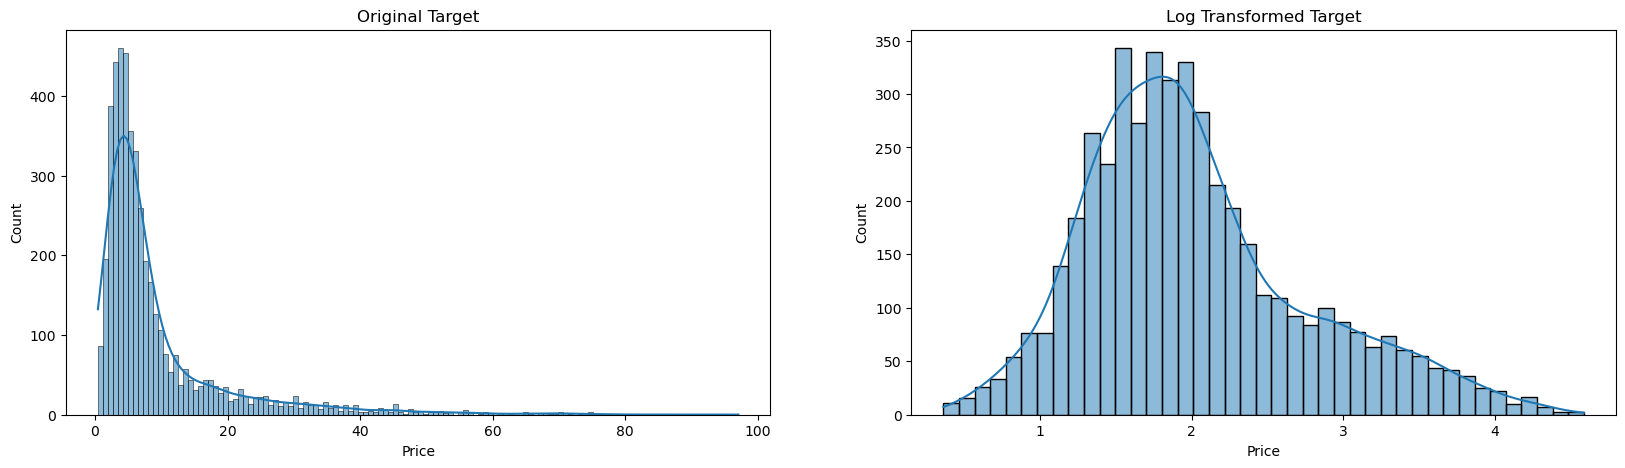

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(ax=axes[0], data=y_train, kde=True)
sns.histplot(ax=axes[1], data=y_train_log, kde=True)
axes[0].set_title('Original Target')
axes[1].set_title('Log Transformed Target')
plt.show()

In [56]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_preprocessed, y_train_log)

# Predictions
y_pred = lr.predict(X_test_preprocessed)

# Model Evaluation
print('Training Accuracy:', lr.score(X_train_preprocessed, y_train_log))
print('Testing Accuracy:', lr.score(X_test_preprocessed, y_test_log))
print('Training RMSE:', np.sqrt(mean_squared_error(y_train_log, lr.predict(X_train_preprocessed))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test_log, y_pred)))

Training Accuracy: 0.8825585195445939
Testing Accuracy: 0.8969723234581259
Training RMSE: 0.25420770907463824
Testing RMSE: 0.23601444862974727


`Log Transformation of the target variable affects the model performance positively`

In [57]:
poly_ridge = make_pipeline(PolynomialFeatures(2), Ridge(alpha=100))
poly_ridge.fit(X_train_preprocessed, y_train_log)

# Predictions
y_pred = poly.predict(X_test_preprocessed)

# Model Evaluation
print('Training Accuracy:', poly_ridge.score(X_train_preprocessed, y_train_log))
print('Testing Accuracy:', poly_ridge.score(X_test_preprocessed, y_test_log))
print('Training RMSE:', np.sqrt(mean_squared_error(y_train_log, poly_ridge.predict(X_train_preprocessed))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test_log, y_pred)))

Training Accuracy: 0.9471297657876172
Testing Accuracy: 0.945106070452392
Training RMSE: 0.170562508752496
Testing RMSE: 12.38854119049753


`This is the best model we got. `

In [58]:
# Try Gradient Descent

from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(random_state=0, max_iter=10000, tol=1e-3, penalty='l2', alpha=10, eta0=0.01)
poly_sgd = make_pipeline(PolynomialFeatures(2), sgd)

poly_sgd.fit(X_train_preprocessed, y_train_log.ravel())

# Predictions
y_pred = poly_sgd.predict(X_test_preprocessed)

# Model Evaluation
print('Training Accuracy:', poly_sgd.score(X_train_preprocessed, y_train_log))
print('Testing Accuracy:', poly_sgd.score(X_test_preprocessed, y_test_log))
print('Training RMSE:', np.sqrt(mean_squared_error(y_train_log, poly_sgd.predict(X_train_preprocessed))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test_log, y_pred)))

Training Accuracy: 0.7820947690345927
Testing Accuracy: 0.7901716373888057
Training RMSE: 0.34626754359688305
Testing RMSE: 0.3368167910413041


In [59]:
# Access the coefficients in the pipeline
print('Intercept:', poly_ridge.named_steps['ridge'].intercept_)
print('Coefficients:', poly_ridge.named_steps['ridge'].coef_)

Intercept: 2.0134722770378852
Coefficients: [ 0.00000000e+00 -3.66861177e-02 -6.30039730e-03  6.43735582e-02
  9.40965086e-02  1.05224096e-02  9.36386212e-02 -1.44903379e-02
 -6.47769091e-03  1.72952609e-03  5.56348296e-03 -6.63057872e-03
 -3.03232503e-02  3.33196314e-02  2.65773251e-02 -2.65773251e-02
 -1.49993770e-03 -1.27204458e-03  3.72924289e-03 -2.70996355e-02
 -2.53000010e-02 -9.24936526e-03  1.22529491e-02  2.88266918e-03
 -2.53315355e-03  2.69919118e-03  9.09111807e-04  1.39282441e-03
  3.48495596e-03  2.35018079e-02  9.03468663e-03 -7.87740535e-03
  6.88636033e-03 -1.40432820e-02  9.66969187e-03  8.10607888e-03
 -1.71631584e-03  6.43091494e-04 -6.20893582e-03 -5.86760616e-03
 -7.36112643e-04 -7.11078078e-03 -1.31469451e-02 -4.01175180e-02
  3.43140033e-03 -2.01051117e-02  5.16553889e-03 -1.52480585e-03
 -2.05566792e-02  2.82322068e-02  2.81617235e-03 -3.56485645e-03
 -1.60644379e-02  6.91827628e-03 -8.75882709e-04  2.05503517e-03
  1.84203676e-02 -4.73784805e-03 -4.33083435e-

In [60]:
# Access the features names in the pipeline
preprocessor.transformers_[1][1].named_steps['binary'].get_feature_names()

['Location_0',
 'Location_1',
 'Location_2',
 'Location_3',
 'Fuel_Type_0',
 'Fuel_Type_1',
 'Fuel_Type_2',
 'Transmission_0',
 'Transmission_1',
 'Brand_0',
 'Brand_1',
 'Brand_2',
 'Brand_3',
 'Brand_4',
 'Model_0',
 'Model_1',
 'Model_2',
 'Model_3',
 'Model_4',
 'Model_5',
 'Model_6',
 'Model_7']

# Saving 

In [61]:
# Preprocessor Saving
import pickle
pickle.dump(preprocessor, open('preprocessor.pkl', 'wb'))

# Model Saving
pickle.dump(poly_ridge, open('model.pkl', 'wb'))

In [62]:
# Inferencing

# Load Preprocessor
preprocessor = pickle.load(open('preprocessor.pkl', 'rb'))
model = pickle.load(open('model.pkl', 'rb'))

In [63]:
# Preprocessing
new_data = X_test.sample(1)
new_data

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model
3304,Hyderabad,2010,120000,Diesel,Manual,Second,26.08,1493,110.00,5.00,Hyundai,Verna


In [64]:
y_test[new_data.index]

3304   3.50
Name: Price, dtype: float64

In [65]:
np.expm1(y_test[new_data.index])


3304   32.12
Name: Price, dtype: float64

In [66]:
# Preprocessing & Prediction
new_data_preprocessed = preprocessor.transform(new_data)
log_price = model.predict(new_data_preprocessed) # in log scale
price = np.expm1(log_price) # in original scale

print('Price:', price[0])

Price: 4.154626870246668


In [1]:
import requests

# Where USD is the base currency you want to use
url = 'https://v6.exchangerate-api.com/v6/f9914a6c7128b4adf0623796/latest/USD'

# Making our request
response = requests.get(url)
data = response.json()

# Your JSON object
print (data)

{'result': 'success', 'documentation': 'https://www.exchangerate-api.com/docs', 'terms_of_use': 'https://www.exchangerate-api.com/terms', 'time_last_update_unix': 1697673602, 'time_last_update_utc': 'Thu, 19 Oct 2023 00:00:02 +0000', 'time_next_update_unix': 1697760002, 'time_next_update_utc': 'Fri, 20 Oct 2023 00:00:02 +0000', 'base_code': 'USD', 'conversion_rates': {'USD': 1, 'AED': 3.6725, 'AFN': 75.1418, 'ALL': 99.9942, 'AMD': 401.6323, 'ANG': 1.79, 'AOA': 837.0971, 'ARS': 350.03, 'AUD': 1.5766, 'AWG': 1.79, 'AZN': 1.7016, 'BAM': 1.8554, 'BBD': 2.0, 'BDT': 110.2533, 'BGN': 1.855, 'BHD': 0.376, 'BIF': 2830.757, 'BMD': 1.0, 'BND': 1.3717, 'BOB': 6.9191, 'BRL': 5.0419, 'BSD': 1.0, 'BTN': 83.2995, 'BWP': 13.6727, 'BYN': 3.2939, 'BZD': 2.0, 'CAD': 1.3686, 'CDF': 2480.872, 'CHF': 0.8989, 'CLP': 936.8377, 'CNY': 7.3201, 'COP': 4207.4332, 'CRC': 531.3748, 'CUP': 24.0, 'CVE': 104.6031, 'CZK': 23.3964, 'DJF': 177.721, 'DKK': 7.0784, 'DOP': 56.7163, 'DZD': 137.5749, 'EGP': 30.9155, 'ERN': 15.

In [6]:
usd_to_inr= data['conversion_rates']['INR']
inr_to_usd = 1/usd_to_inr
lakh_to_usd = inr_to_usd * 100000
lakh_to_usd

1200.4211077245898

In [67]:
# API for Currency Conversion
import requests
response = requests.get('https://api.exchangerate-api.com/v4/latest/INR')
response.json()

{'provider': 'https://www.exchangerate-api.com',
 'WARNING_UPGRADE_TO_V6': 'https://www.exchangerate-api.com/docs/free',
 'terms': 'https://www.exchangerate-api.com/terms',
 'base': 'INR',
 'date': '2023-10-01',
 'time_last_updated': 1696118402,
 'rates': {'INR': 1,
  'AED': 0.0442,
  'AFN': 0.941,
  'ALL': 1.21,
  'AMD': 4.75,
  'ANG': 0.0215,
  'AOA': 10.04,
  'ARS': 4.21,
  'AUD': 0.0186,
  'AWG': 0.0215,
  'AZN': 0.0205,
  'BAM': 0.0222,
  'BBD': 0.0241,
  'BDT': 1.32,
  'BGN': 0.0222,
  'BHD': 0.00452,
  'BIF': 34.06,
  'BMD': 0.012,
  'BND': 0.0164,
  'BOB': 0.0833,
  'BRL': 0.0605,
  'BSD': 0.012,
  'BTN': 1,
  'BWP': 0.165,
  'BYN': 0.0346,
  'BZD': 0.0241,
  'CAD': 0.0162,
  'CDF': 29.94,
  'CHF': 0.011,
  'CLP': 10.9,
  'CNY': 0.0878,
  'COP': 49.16,
  'CRC': 6.44,
  'CUP': 0.289,
  'CVE': 1.25,
  'CZK': 0.277,
  'DJF': 2.14,
  'DKK': 0.0848,
  'DOP': 0.683,
  'DZD': 1.65,
  'EGP': 0.371,
  'ERN': 0.18,
  'ETB': 0.665,
  'EUR': 0.0114,
  'FJD': 0.0276,
  'FKP': 0.00984,
  'FO

In [68]:
# from INR to USD
inr_to_usd = response.json()['rates']['USD']
inr_to_usd

0.012

In [69]:
# from Lakh to USD
lakh_to_usd = inr_to_usd*100000
lakh_to_usd

1200.0

In [70]:
# From Lakhs to USD
price_usd = price[0] * lakh_to_usd
print('Price in USD:', price_usd)

Price in USD: 4985.552244296002


In [71]:
# Extract Data for Deployment
locations = df_copy.Location.unique().tolist()
years = df_copy.Year.unique().tolist()
Owner_Type = df_copy.Owner_Type.unique().tolist()
Min_Mileage, Max_Mileage = df_copy.Mileage.min(), df_copy.Mileage.max()
Min_Engine, Max_Engine = df_copy.Engine.min(), df_copy.Engine.max()
Min_Power, Max_Power = df_copy.Power.min(), df_copy.Power.max()

# Models for every brand
brands = {}         # key: brand, value: list of models
for brand in df_copy.Brand.unique().tolist():
    brands[brand] = df_copy[df_copy.Brand == brand].Model.unique().tolist()
# Seats for every model
seats = {}          # key: model, value: list of seats
for model in df_copy.Model.unique().tolist():
    seats[model] = df_copy[df_copy.Model == model].Seats.unique().tolist()

# Transmissions
transmissions = {}
for model in df_copy.Model.unique().tolist():
    transmissions[model] = df_copy[df_copy.Model == model].Transmission.unique().tolist()

# Fuel Types
fuel_types = {}
for model in df_copy.Model.unique().tolist():
    fuel_types[model] = df_copy[df_copy.Model == model].Fuel_Type.unique().tolist()

# Save the data
data = {'locations': locations,
        'years': years,
        'fuel_types': fuel_types,
        'transmissions': transmissions,
        'brands': brands,
        'Owner_Type': Owner_Type,
        'Min_Mileage': Min_Mileage,
        'Max_Mileage': Max_Mileage,
        'Min_Engine': Min_Engine,
        'Max_Engine': Max_Engine,
        'Min_Power': Min_Power,
        'Max_Power': Max_Power,
        'seats': seats,
        'lakh_to_usd': lakh_to_usd
        }

pickle.dump(data, open('data_for_deploy.pkl', 'wb'))

# Streamlit

In [72]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
import pickle

st.title('Used Cars Price Prediction')

# Load Data for Deployment
data = pickle.load(open('data_for_deploy.pkl', 'rb'))

# Input Data
car_brand = st.selectbox('Brand', data['brands'].keys())
car_model = st.selectbox('Model', data['brands'][car_brand])
fuel_type = st.selectbox('Fuel Type', data['fuel_types'][car_model])
transmission = st.selectbox('Transmission', data['transmissions'][car_model])
seats = st.selectbox('Seats', data['seats'][car_model])

location = st.selectbox('Location', data['locations'])
year = st.selectbox('Year', range(min(data['years']), max(data['years'])+1))
km_driven = st.slider('Kilometers Driven', min_value= 10, max_value=500000, step=1)

owner_type = st.selectbox('Owner Type', data['Owner_Type'])
mileage = st.slider('Mileage', min_value=data['Min_Mileage'], max_value=data['Max_Mileage'])
engine = st.slider('Engine', min_value=data['Min_Engine'], max_value=data['Max_Engine'])
power = st.slider('Power', min_value=data['Min_Power'], max_value=data['Max_Power'])



new_data = pd.DataFrame({'Location': location,
                         'Year': year,
                         'Kilometers_Driven': km_driven,
                         'Fuel_Type': fuel_type,
                         'Transmission': transmission,
                         'Owner_Type': owner_type,
                         'Mileage': mileage,
                         'Engine': engine,
                         'Power': power,
                         'Seats': seats,
                         'Brand': car_brand,
                         'Model': car_model}, index=[0])

# Preprocessing
preprocessor = pickle.load(open('preprocessor.pkl', 'rb'))
new_data_preprocessed = preprocessor.transform(new_data)


# Prediction
model = pickle.load(open('model.pkl', 'rb'))
log_price = model.predict(new_data_preprocessed) # in log scale
price = np.expm1(log_price) # in original scale

# From Lakhs to USD
price_usd = price[0] * data['lakh_to_usd']

# Output
if st.button('Predict'):
    st.header('Predicted Price')
    st.markdown('**Price in USD**: $' + str(round(price_usd, 2)))



Overwriting app.py
